# TP 5.2 : Étude de cas en imagerie

L'objectif de ce TP est de mettre en oeuvre des méthodes de statistique exploratoire sur un type particulier de données : une image.

## 1. Les données

Les images proposées dans le dossier `data/images` sont au format PNM et de de taille $512 \times 512$. Pour commencer, vous devez choisir une image et la charger à l'aide de la fonction `read.pnm()` du package `pixmap` (les erreurs peuvent être ignorées).

In [1]:
library(pixmap)

mon_image_fichier <- "data/images/Yacht_512.pnm"
mon_image <- read.pnm(mon_image_fichier)

L'image peut être affichée grâce à la fonction `plot()`.

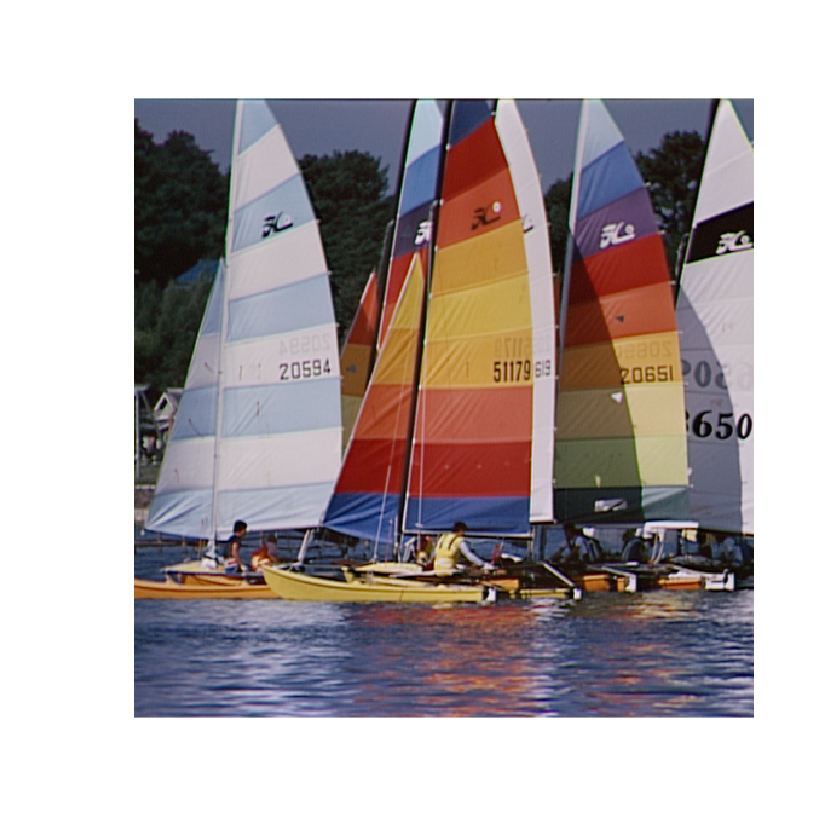

In [2]:
plot(mon_image)

L'objet `mon_image` est de classe `pixmapRGB` qui suit le formalisme objet S4. Ce détail technique est sans grande importance si ce n'est que l'accès aux composants de `mon_image` est différent du formalisme S3 habituel. Ainsi, nous pouvons lister les composants de l'objet avec la commande `slotNames()` au lieu de `names()` et accéder à ces composants avec l'opérateur `@` au lieu de `$`.

In [3]:
# Classe de l'objet
class(mon_image)

[1] "pixmapRGB"
attr(,"package")
[1] "pixmap"

In [4]:
# Liste des composants
slotNames(mon_image)

[1] "red"      "green"    "blue"     "channels" "size"     "cellres"  "bbox"    
[8] "bbcent"

In [5]:
# Accès aux composants
mon_image@size

[1] 512 512

## 2. Analyse 1D

Les analyses unidimensionnelle vont porter sur les valeurs de l'ensemble des  pixels de l'image dans chaque canal (*channel*). Nous pouvons par exemple travailler sur le canal rouge à partir de l'objet `mon_image_rouge` défini comme ci-dessous ainsi que sur les canaux vert et bleu.

In [ ]:
mon_image_rouge <- as.vector(mon_image@red)
mon_image_vert <- as.vector(mon_image@green)
mon_image_bleu <- as.vector(mon_image@blue)

    [1] 0.301960784 0.352941176 0.325490196 0.325490196 0.341176471 0.341176471
    [7] 0.341176471 0.333333333 0.337254902 0.345098039 0.337254902 0.333333333
   [13] 0.345098039 0.352941176 0.384313725 0.345098039 0.298039216 0.247058824
   [19] 0.172549020 0.101960784 0.121568627 0.113725490 0.101960784 0.098039216
   [25] 0.101960784 0.098039216 0.105882353 0.109803922 0.086274510 0.113725490
   [31] 0.066666667 0.117647059 0.094117647 0.098039216 0.105882353 0.098039216
   [37] 0.117647059 0.117647059 0.086274510 0.105882353 0.117647059 0.090196078
   [43] 0.074509804 0.074509804 0.094117647 0.098039216 0.129411765 0.117647059
   [49] 0.117647059 0.101960784 0.082352941 0.058823529 0.062745098 0.090196078
   [55] 0.062745098 0.054901961 0.086274510 0.082352941 0.066666667 0.082352941
   [61] 0.074509804 0.094117647 0.094117647 0.058823529 0.062745098 0.078431373
   [67] 0.098039216 0.078431373 0.101960784 0.082352941 0.066666667 0.082352941
   [73] 0.082352941 0.062745098 0.070588

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Calculer quelques statistiques élémentaires sur chaque canal de l'image initial à l'aide de <code>summary()</code>.</li>
        <li>Représenter en parallèle les 3 boxplots correspondant aux canaux de l'image.</li>
        <li>Représenter les histogrammes avec <code>hist()</code> accompagnés d'une courbe de densité estimée par la fonction <code>density()</code>.<br>
            <center><img src="img/image_rgb.png"></center>
        </li>
    </ol>
</div>

[1] "red"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2824  0.4471  0.4610  0.6745  0.9294 


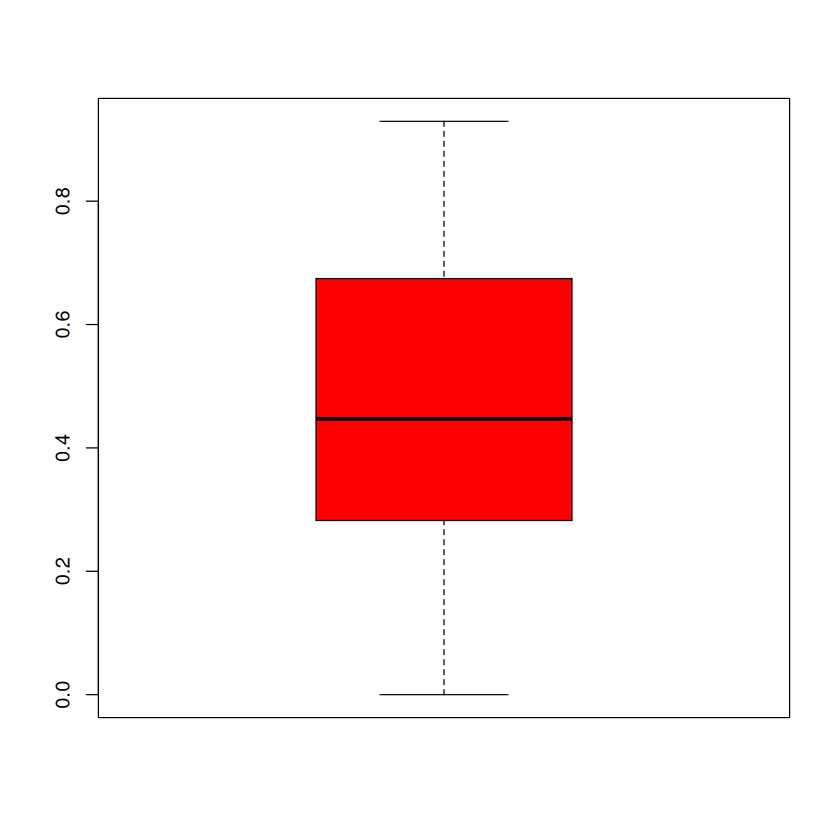

[1] "green"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2314  0.3725  0.4002  0.6000  0.8980 


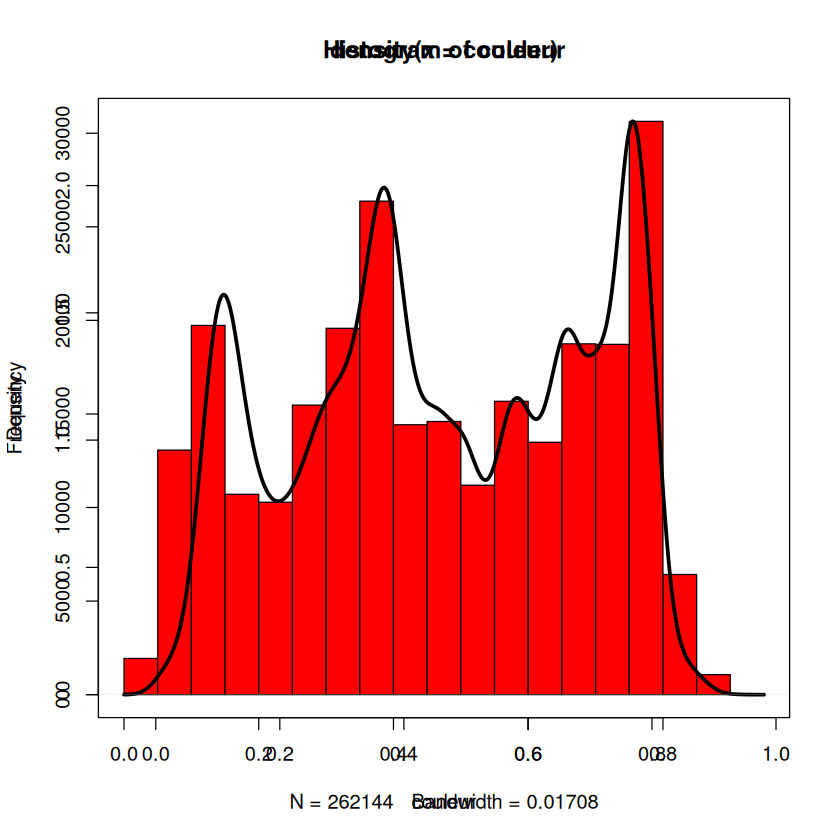

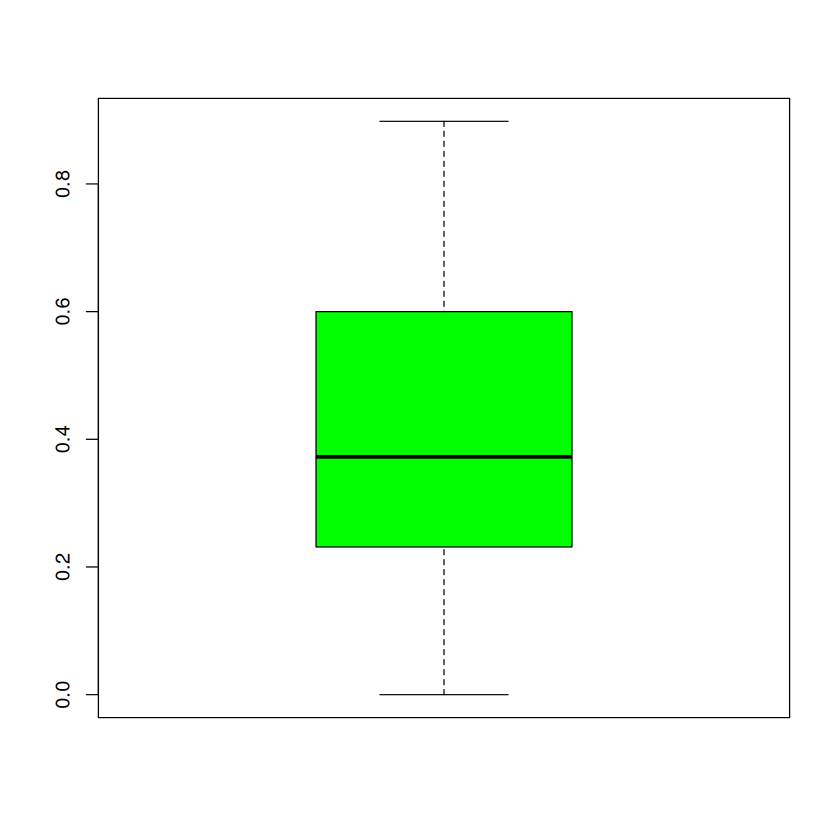

[1] "blue"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2039  0.4078  0.4083  0.5922  0.9647 


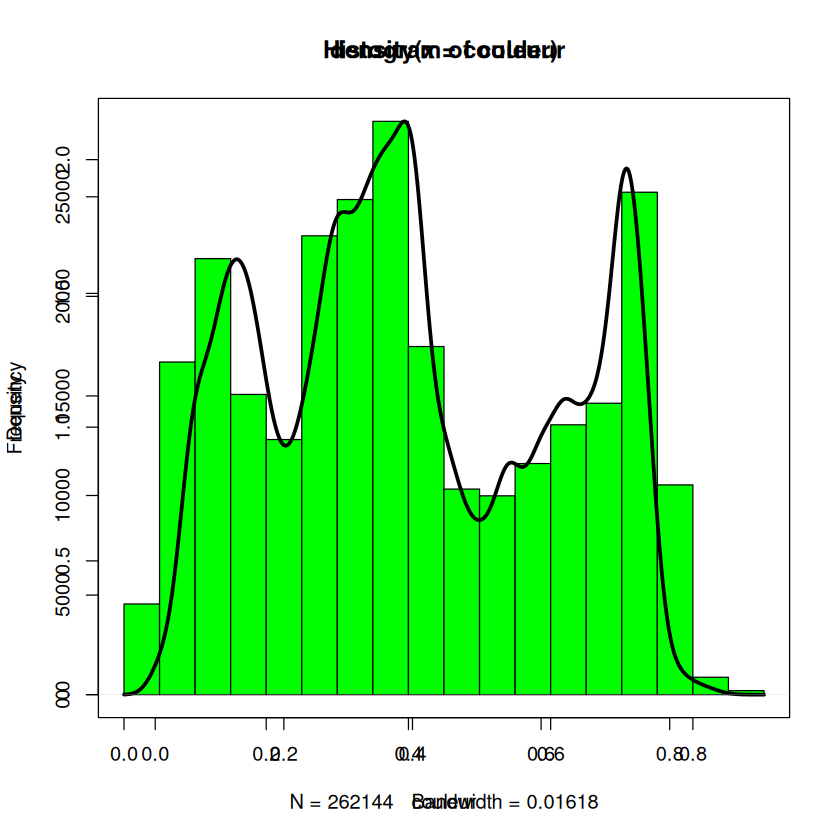

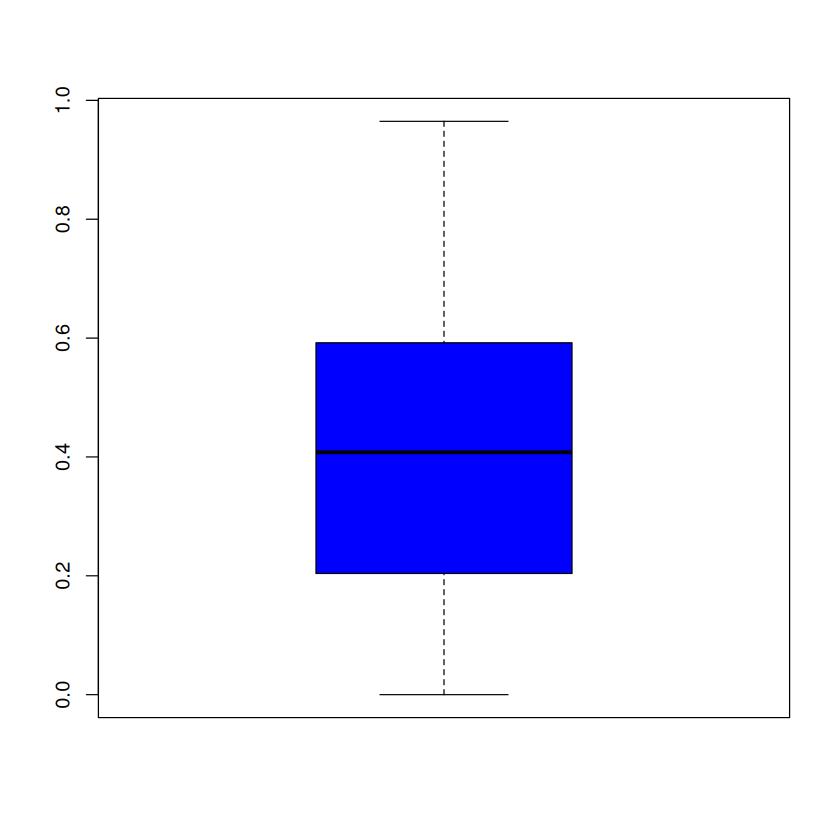

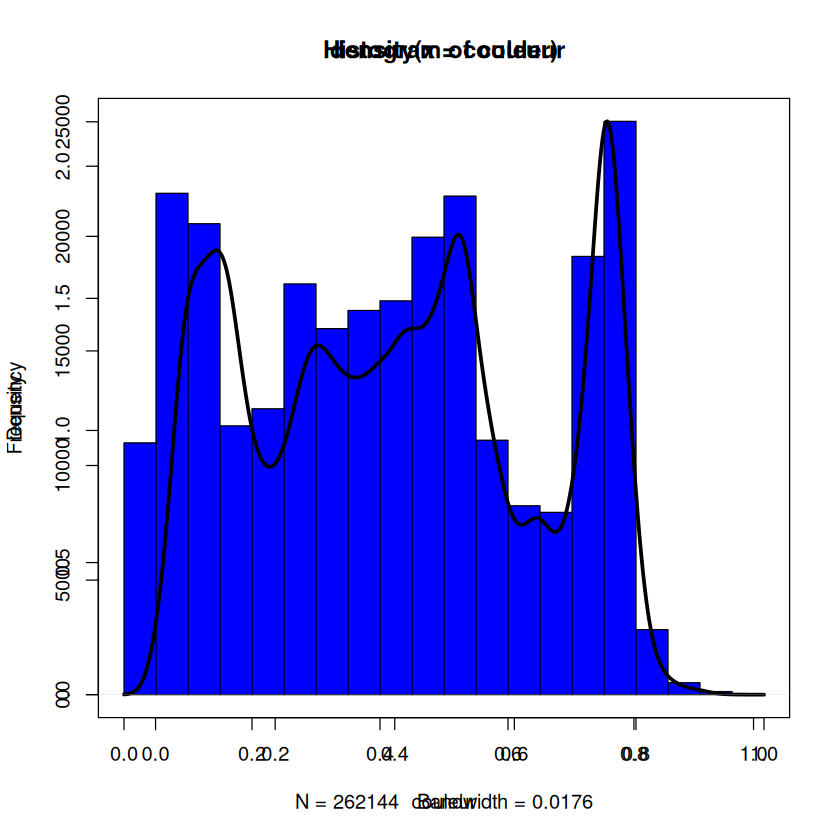

In [13]:
simple <- function(couleur, coulnom){
    print(coulnom)
    print(summary(couleur))
    par(bg="white")
    boxplot(couleur, col=coulnom)
    hist(couleur, col=coulnom)
    par(new=TRUE)
    plot(density(couleur), lwd=3)
}
simple(mon_image_rouge, "red")
simple(mon_image_vert, "green")
simple(mon_image_bleu, "blue")

## 3. Analyse 2D

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter les nuages de points croisant les canaux deux à deux. Utiliser l'option <code>pch="."</code> de la fonction <code>plot()</code> pour alléger les graphiques.</li>
        <li>Calculer la matrice des corrélations linéaire de Pearson entre chaque canaux.</li>
    </ol>
    <center><img src="img/image_2d.png"></center>
</div>

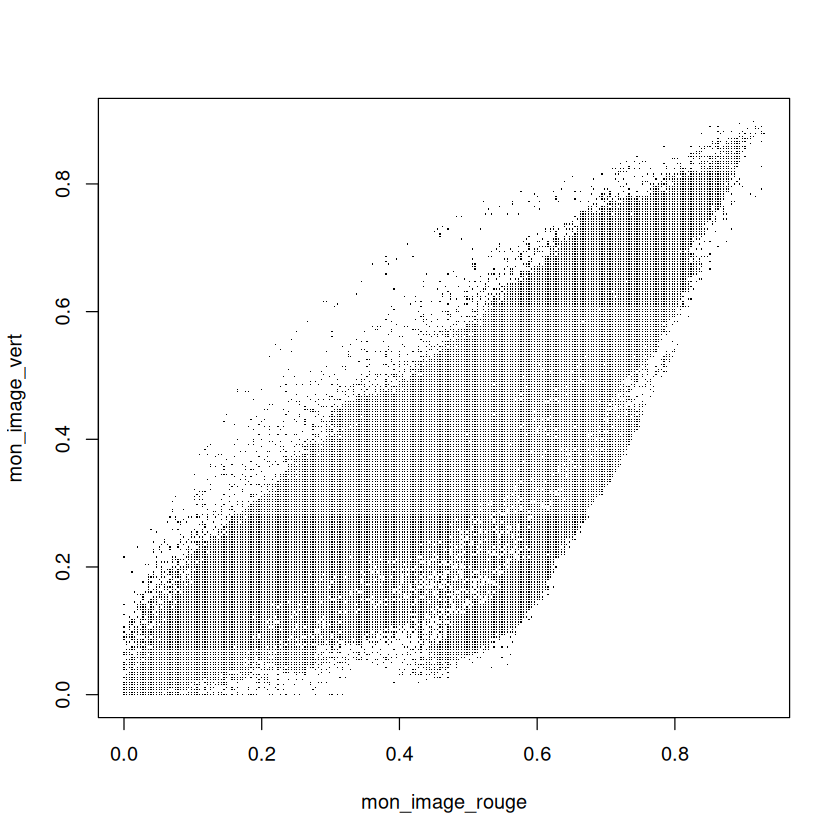

In [ ]:
# À FAIRE
par(bg="white")
plot(mon_image_rouge, mon_image_vert, pch='.')
# chaque point est un pixel. On représente sa valeur RG. 

## 4. Analyse multidimensionnelle

Dans cette section, nous supposons que les données sont stockées dans un `data.frame` à 3 colonnes (une colonne par canal) et n lignes (une ligne par pixel de l'image, soit 262144 pour une image de taille $512 \times 512$).

In [17]:
df_image <- data.frame(
    rouge = mon_image_rouge,
    vert  = mon_image_vert,
    bleu  = mon_image_bleu
)

cat("Dimensions du data frame :", dim(df_image))

Dimensions du data frame : 262144 3

### 4.1 Classification

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Procéder à une classification des pixels avec <code>kmeans()</code> à 2, 4 et 8 groupes et stocker les résultats dans <code>kmeans_image_2</code>, <code>kmeans_image_4</code> et <code>kmeans_image_8</code>, respectivement.</li>
        <li>Utiliser la fonction <code>pixmapGrey()</code> avec l'option <code>nrow=512</code> pour convertir les résultats de chaque classification en une image de niveaux de gris.</li>
        <li>Utiliser <code>plot()</code> pour visualiser ces images.</li>
        <li>Commenter la mise en oeuvre d'une méthode de classification sur une image. Comment pourrait-on définir un nombre de groupes raisonnable avant de procéder à un algorithme K-means comme décrit précédemment ?</li>
    </ol>
    <center><img src="img/image_cluster.png"></center>
</div>

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


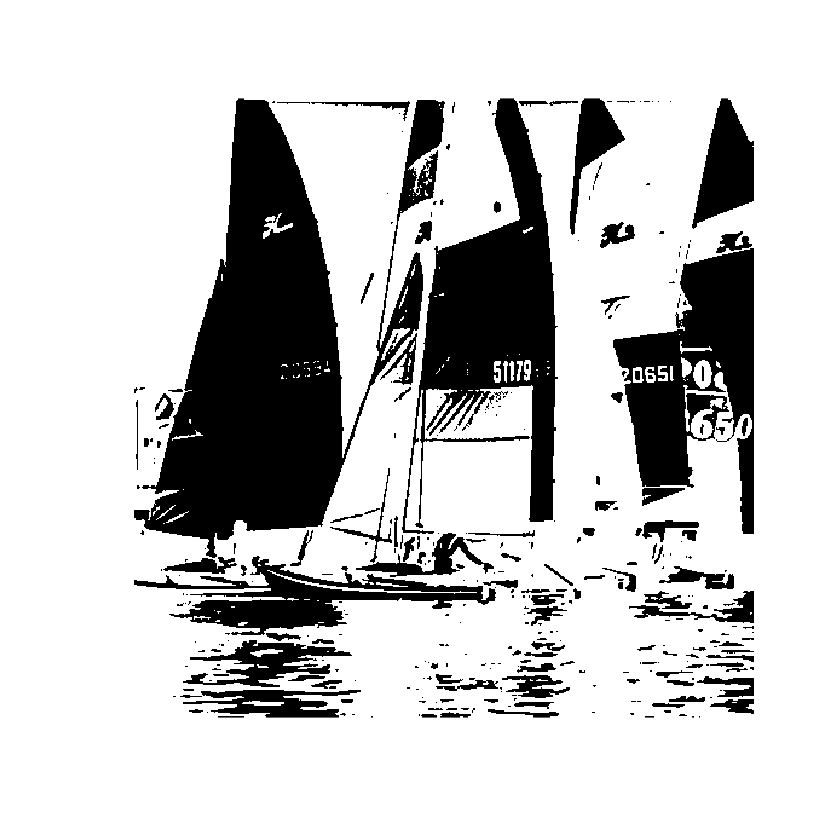

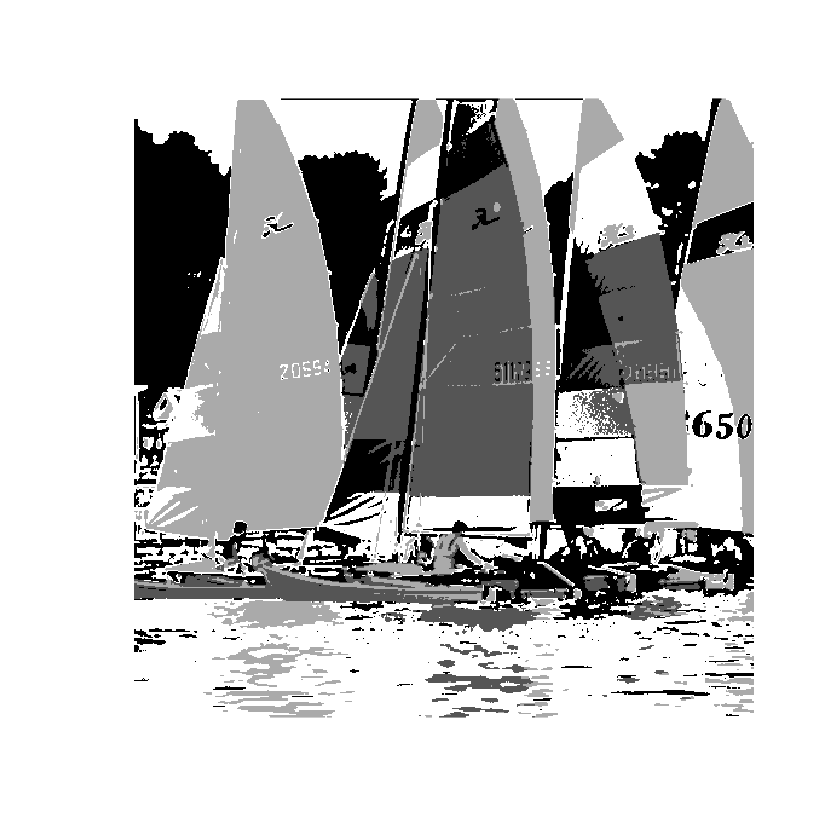

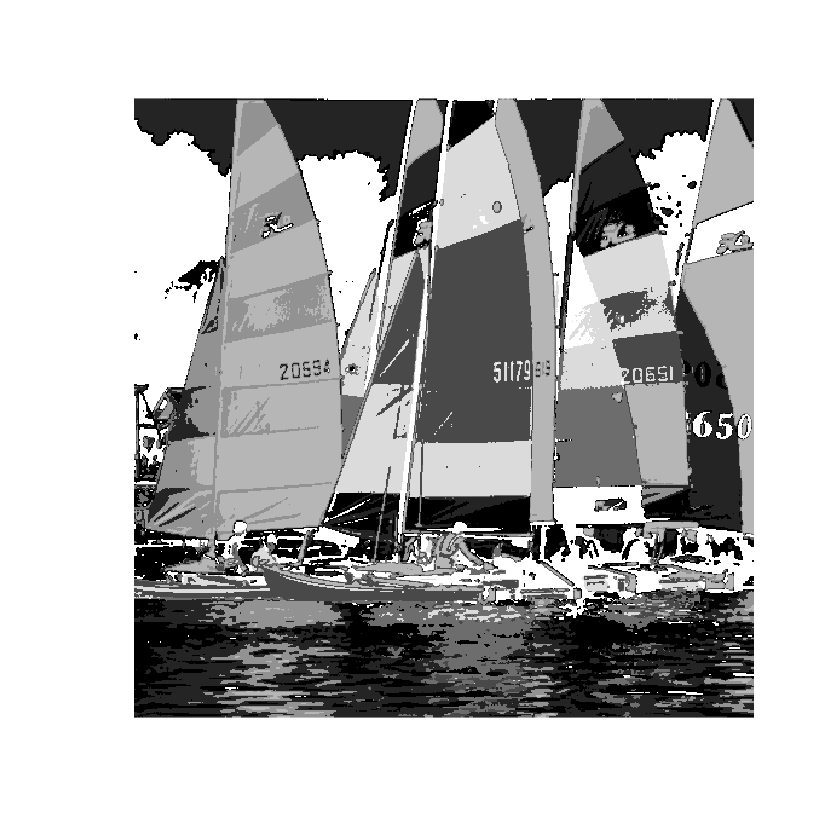

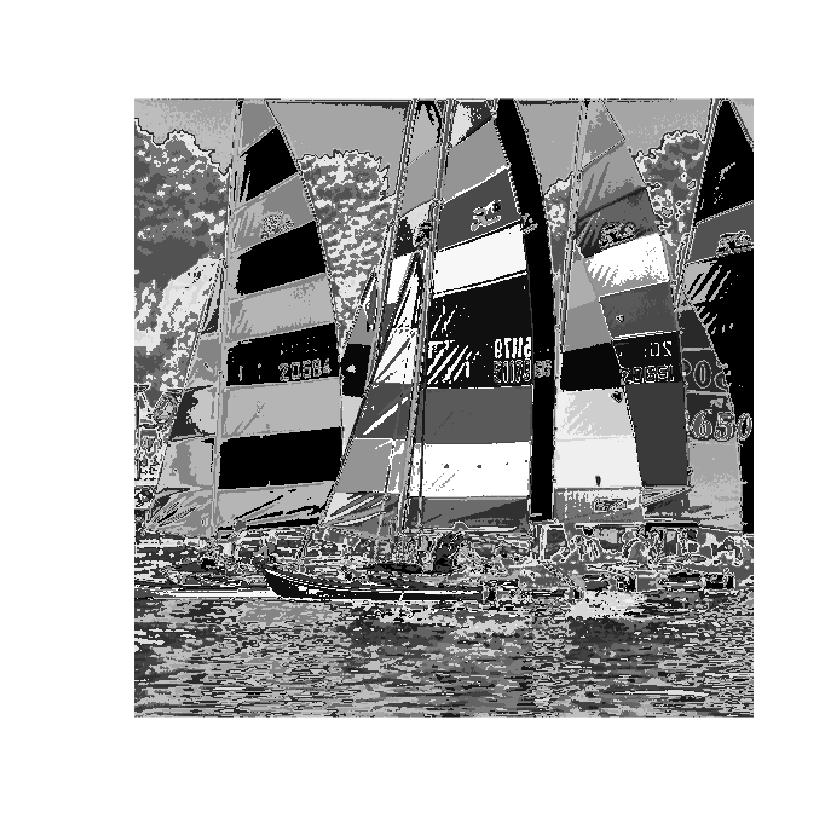

In [31]:
# kmeans avec différents k
km_image_2 = kmeans(df_image, centers=2)
km_image_4 = kmeans(df_image, centers=4)
km_image_8 = kmeans(df_image, centers=8)
km_image_32 = kmeans(df_image, centers=32)

print(names(km_image_2))

# affiche image
p2 = pixmapGrey(km_image_2$cluster, nrow=512)
plot(p2)
p4 = pixmapGrey(km_image_4$cluster, nrow=512)
plot(p4)
p8 = pixmapGrey(km_image_8$cluster, nrow=512)
plot(p8)
p32 = pixmapGrey(km_image_32$cluster, nrow=512)
plot(p32)

### 4.2 Analyse en composantes principales

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP en utilisant la fonction <code>PCA()</code> de <code>FactoMineR</code> sans réduire les données (option <code>scale.unit=FALSE</code>).</li>
        <li>Expliquer pourquoi les données ne doivent pas être réduites.</li>
        <li>Le package <code>FactoMineR</code> dispose d'une fonction de reconstruction des données à partir des résultats d'une ACP. Par exemple, pour reconstruire l'image à partir de la première composante principale seulement, nous utiliserons l'option <code>ncp=1</code> de la fonction <code>reconst()</code>. Voici un exemple de code que vous pouvez reprendre pour repasser du format vectoriel à une matrice d'image en limitant les valeurs au segment $[0,1]$ grâce aux fonctions <code>pmin()</code> et <code>pmax()</code>.</li>
    </ol>
</div>

In [ ]:
library(FactoMineR)
acp_image = PCA(df_image, scale.unit=FALSE)
# réduction : toutes les couleurs sont dans la même unité, on altererait les couleurs

# Reconstruction à partir de la première composante principale
reconst_cp1 <- reconst(acp_image, ncp=1)

# Copie de l'image initiale
mon_image_cp1 <- mon_image

# Remplacement des canaux par la reconstruction
mon_image_cp1@red <- matrix(pmax(pmin(reconst_cp1[,1], 1), 0), 512, 512)
mon_image_cp1@green <- matrix(pmax(pmin(reconst_cp1[,2], 1), 0), 512, 512)
mon_image_cp1@blue <- matrix(pmax(pmin(reconst_cp1[,3], 1), 0), 512, 512)
print("done")


[1] "done"


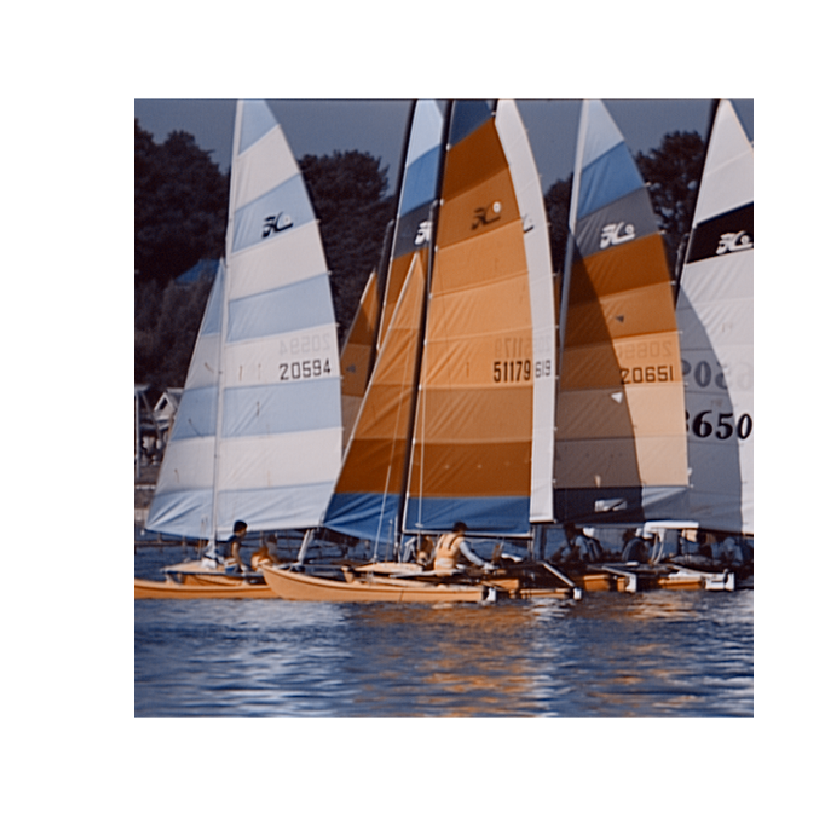

In [33]:

# Affichage de l'image reconstruite
plot(mon_image_cp1)

<div class="alert alert-block alert-success">
    <ol start="4">
        <li>Utiliser le code ci-dessus pour reconstruire l'image à partir de 1, 2 et 3 composantes principales. Comparer les résultats à l'image initiale.</li>
        <li>Commenter les différentes manipulations réalisées autour de l'ACP. En quoi les résultats de la reconstruction illustrent-ils le principe de l'ACP ?</li>
    </ol>
</div>

[1] "done"


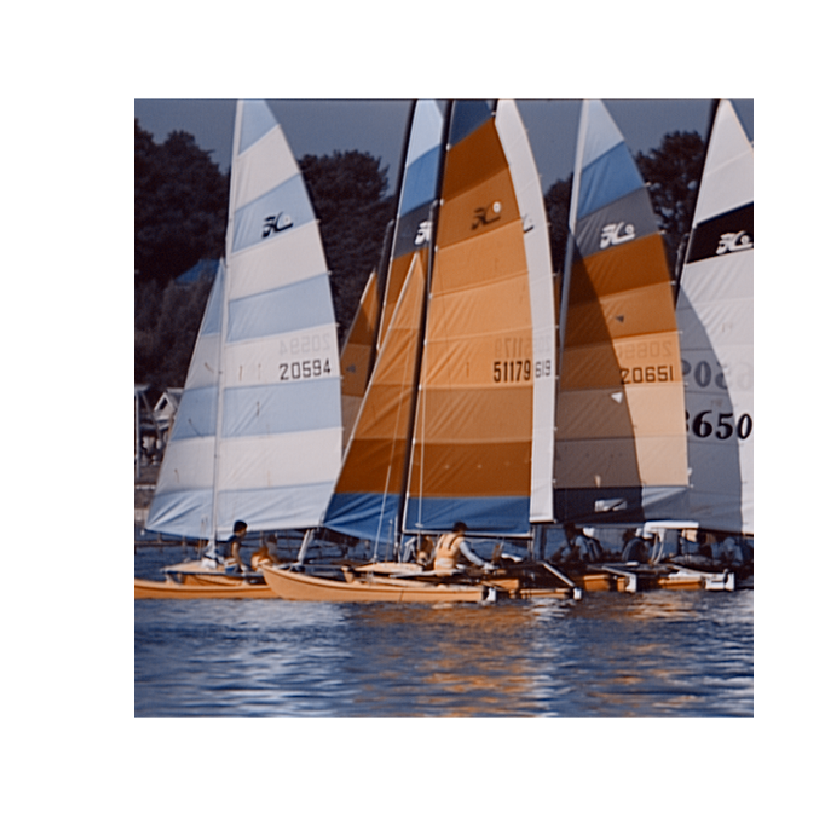

In [34]:
# Reconstruction à partir des deux premières composantes principales
reconst_cp2 <- reconst(acp_image, ncp=2)

# Copie de l'image initiale
mon_image_cp2 <- mon_image

# Remplacement des canaux par la reconstruction
mon_image_cp2@red <- matrix(pmax(pmin(reconst_cp2[,1], 1), 0), 512, 512)
mon_image_cp2@green <- matrix(pmax(pmin(reconst_cp2[,2], 1), 0), 512, 512)
mon_image_cp2@blue <- matrix(pmax(pmin(reconst_cp2[,3], 1), 0), 512, 512)
print("done")
plot(mon_image_cp2)

[1] "done"


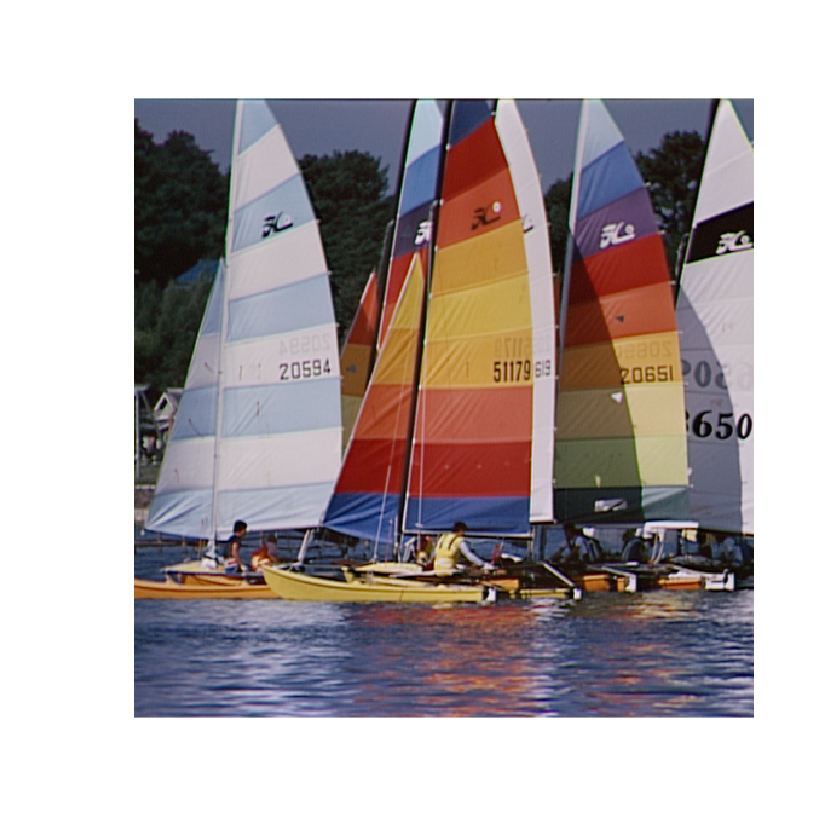

In [ ]:
# Reconstruction à partir des deux premières composantes principales
reconst_cp3 <- reconst(acp_image, ncp=3)

# Copie de l'image initiale
mon_image_cp3 <- mon_image

# Remplacement des canaux par la reconstruction
mon_image_cp3@red <- matrix(pmax(pmin(reconst_cp3[,1], 1), 0), 512, 512)
mon_image_cp3@green <- matrix(pmax(pmin(reconst_cp3[,2], 1), 0), 512, 512)
mon_image_cp3@blue <- matrix(pmax(pmin(reconst_cp3[,3], 1), 0), 512, 512)
print("done")
plot(mon_image_cp3) #on retombe sur l'image initiale